<a href="https://colab.research.google.com/github/niladrig63-pixel/IrisFlowerClassification/blob/main/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌸 Iris Flower Classification Project

## Introduction
The Iris dataset is a famous dataset in machine learning, containing 150 samples of iris flowers.  
Each flower has 4 features:
- Sepal length
- Sepal width
- Petal length
- Petal width  

The goal is to classify iris flowers into 3 species:
- Setosa
- Versicolor
- Virginica  

We will build a machine learning model using **Logistic Regression** and evaluate its performance with graphs and metrics.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Load Iris dataset
iris = load_iris()

# Features (X) and labels (y)
X = iris.data
y = iris.target

# Convert to DataFrame (for better understanding)
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


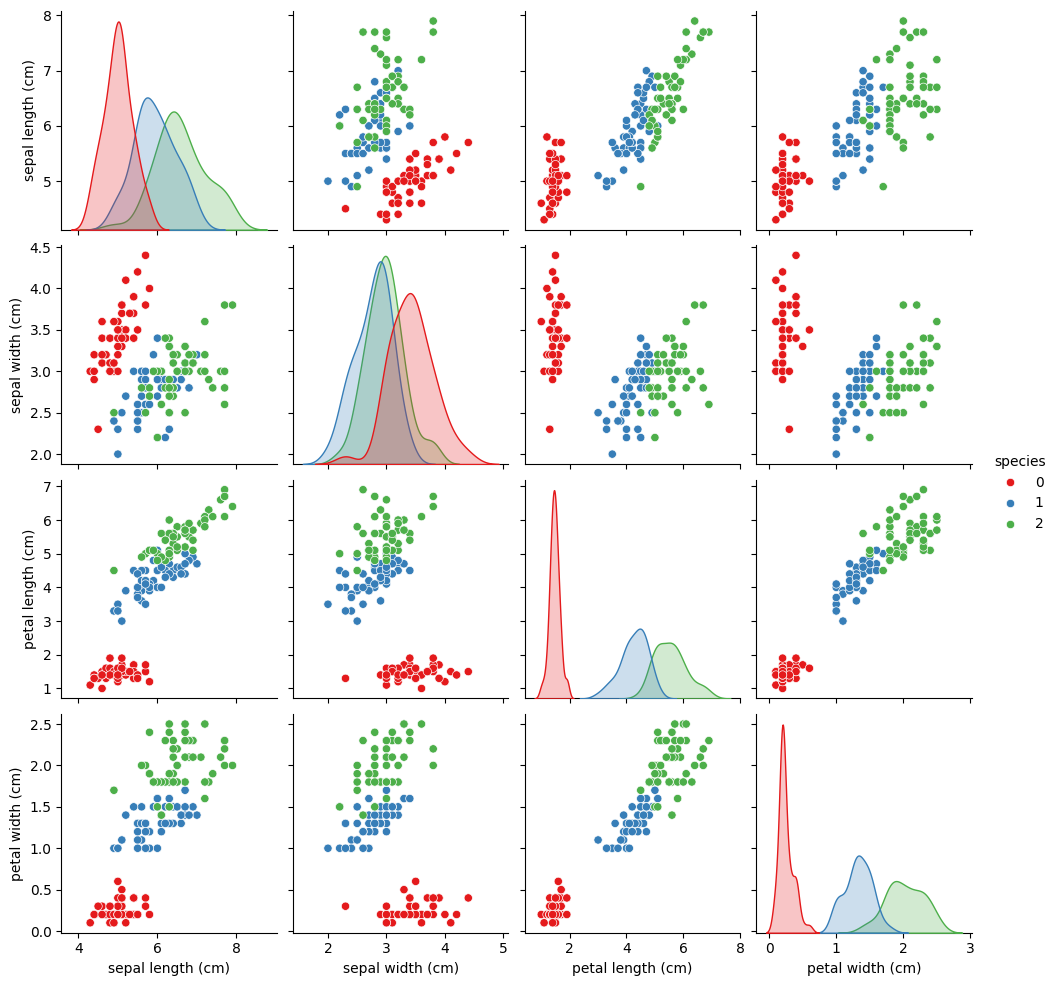

In [ ]:
sns.pairplot(df, hue="species", palette="Set1")
plt.show()


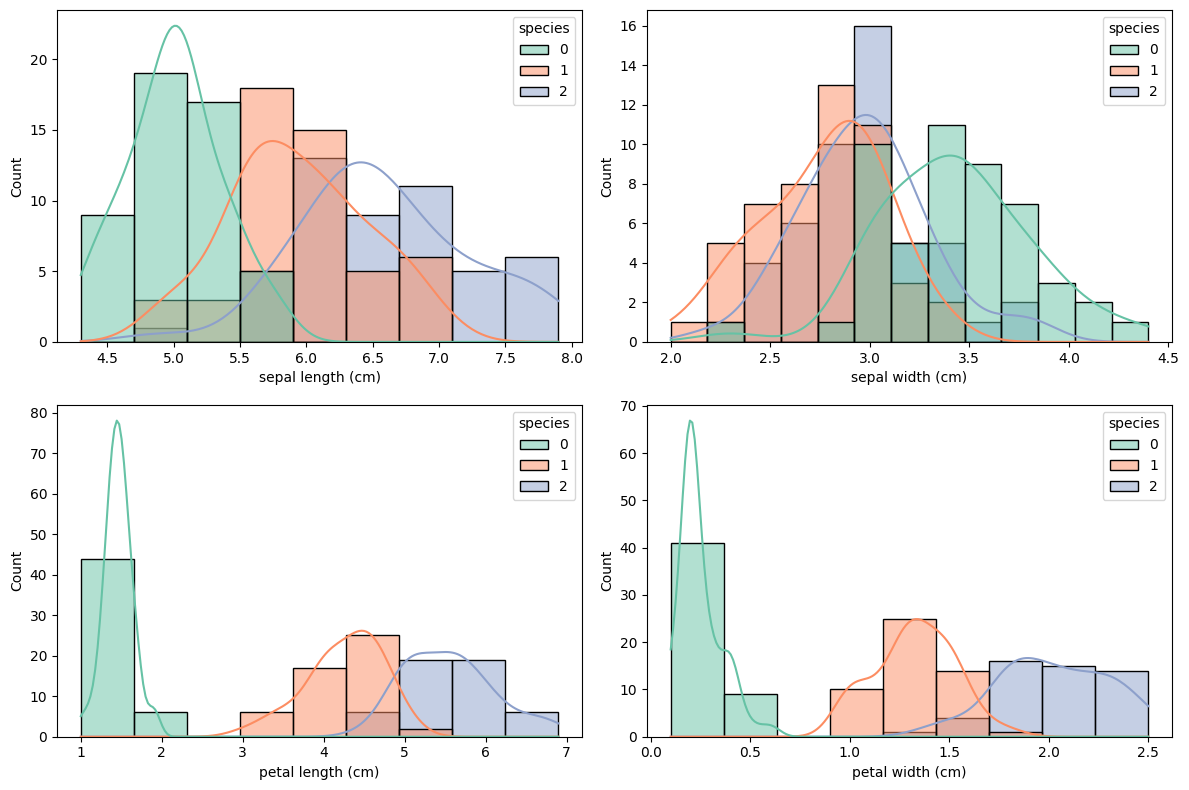

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, hue="species", kde=True, palette="Set2")
plt.tight_layout()
plt.show()


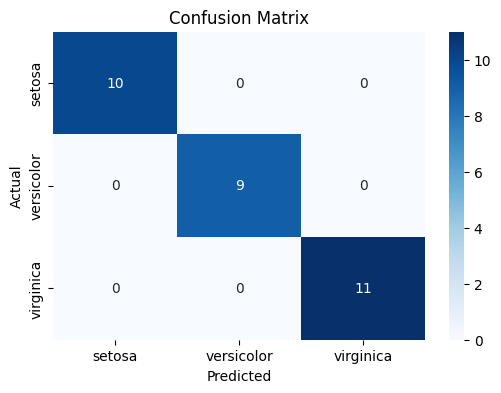

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


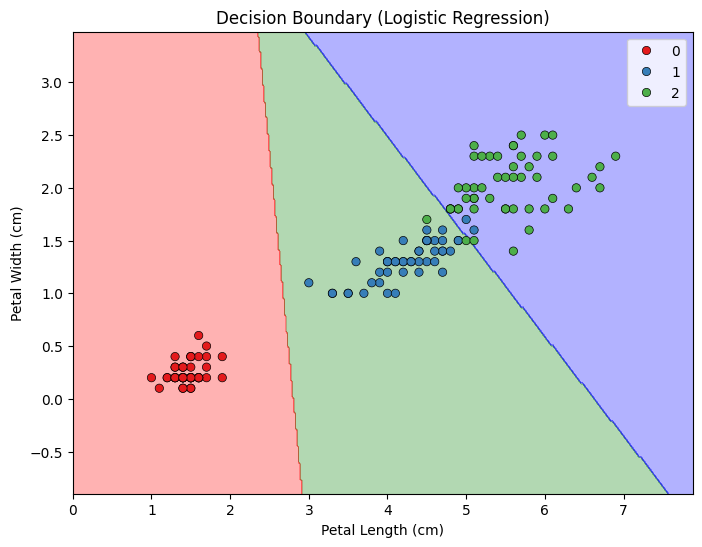

In [ ]:
from matplotlib.colors import ListedColormap

X_simple = df[["petal length (cm)", "petal width (cm)"]].values
y_simple = df["species"].values

# Train on only 2 features
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)
model2 = LogisticRegression(max_iter=200)
model2.fit(X_train2, y_train2)

# Plot decision boundary
x_min, x_max = X_simple[:, 0].min() - 1, X_simple[:, 0].max() + 1
y_min, y_max = X_simple[:, 1].min() - 1, X_simple[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(("red", "green", "blue")))
sns.scatterplot(x=X_simple[:, 0], y=X_simple[:, 1], hue=y_simple, palette="Set1", edgecolor="k")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Boundary (Logistic Regression)")
plt.show()


Target (Output): Species

0 → Setosa

1 → Versicolor

2 → Virginica

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0


In [ ]:
# User input
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

sample = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
sample = scaler.transform(sample)

prediction = model.predict(sample)
print("Predicted species:", iris.target_names[prediction][0])


Enter sepal length (cm): 3
Enter sepal width (cm): 4
Enter petal length (cm): 1
Enter petal width (cm): 2
Predicted species: setosa
